<a href="https://colab.research.google.com/github/rubengamarro/Kobe/blob/main/InvestigacionOperativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#   Leyenda para 'shot_zone_area':

#        Back Court(BC)                            DESDE TU PROPIO CAMPO
#                Center(C)                         ZONA CENTRAL
#     Left Side Center(LC)                         ZONA CENTRAL A LA IZQUIERDA
#            Left Side(L)                          IZQUIERDA
#    Right Side Center(RC)                         ZONA CENTRAL A LA DERECHA
#           Right Side(R)                          DERECHA



#   Leyenda para 'shot_type':

#           Bank Shot                                 TIRO A TABLERO
#                Dunk                                 MATE
#           Hook Shot                                 GANCHO (buscar en google si no se concoce)
#           Jump Shot                                 TIRO SALTANDO
#               Layup                                 BANDEJA (buscar en google si no se conoce)
#            Tip Shot                                 ENCESTAR EL REBOT



#Librerias para cargar
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
#!pip install sklearn
#!apt-get -qq install -y sklearn
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random
import math
import pandas as pd
#!pip install graphivz
#!apt-get -qq install -y graphivz
import graphviz

In [ ]:
# Cargamos una base de datos preexistente
kobedata = pd.read_csv('https://raw.githubusercontent.com/raguiso/kobebryant/main/data.csv', sep =',')
kobedata

# Cargar los datos


# Ver las primeras filas del dataframe para conocer su estructura


# Eliminar las columnas innecesarias
columns_to_drop = ['action_type', 'game_event_id', 'game_id', 'lat', 'lon', 'team_id',
                   'game_date', 'matchup', 'opponent', 'team_name', 'playoffs', 'seconds_remaining','shot_zone_range']
kobedata_mas_completo = kobedata.drop(columns=columns_to_drop)

columns_to_drop_estudio = ['action_type', 'game_event_id', 'game_id', 'lat', 'lon', 'team_id', 'minutes_remaining',
                   'game_date', 'matchup', 'opponent', 'team_name', 'playoffs', 'seconds_remaining','shot_zone_range','loc_x','loc_y','shot_type','shot_distance','shot_id','shot_zone_basic']

kobedata_estudio = kobedata.drop(columns=columns_to_drop_estudio)



# Preprocesamiento de los datos

# Eliminar filas donde haya NaN
kobedata_estudio.dropna(inplace=True)

kobedata_estudio
# Crear un diccionario que asigne un número a cada temporada única
kobedata_estudio['season_numeric'] = kobedata_estudio['season'].astype('category').cat.codes

# Verificar el resultado
kobedata_estudio[['season', 'season_numeric']].drop_duplicates().sort_values('season_numeric')

# Convertir el valor de 'season' a un número utilizando solo el año inicial
kobedata_estudio['season_numeric'] = kobedata_estudio['season'].apply(lambda x: int(x.split('-')[0]))

# Verificar el resultado
kobedata_estudio[['season', 'season_numeric']].drop_duplicates().sort_values('season_numeric')
columns_to_drop = ['season']
kobedata_estudio = kobedata_estudio.drop(columns=columns_to_drop)




# # Filtrar las temporadas de 2007 a 2011
# # Asumiendo que la columna 'season' ya está en formato numérico o en el formato '2007-08'

# # Primero, asegúrate de que la columna 'season_numeric' contenga el año inicial de la temporada
kobedata_estudio = kobedata_estudio[(kobedata_estudio['season_numeric'] >= 2007) & (kobedata_estudio['season_numeric'] <= 2011)]

kobedata_estudio = kobedata_estudio.drop(columns=['season_numeric'])
kobedata_estudio

,combined_shot_type,period,shot_made_flag,shot_zone_area
11463,Jump Shot,1,0.0,Center(C)
11464,Layup,1,0.0,Center(C)
11465,Layup,1,1.0,Center(C)
11466,Jump Shot,1,1.0,Center(C)
11467,Jump Shot,1,0.0,Right Side Center(RC)
...,...,...,...,...
30025,Dunk,4,1.0,Center(C)
30026,Bank Shot,4,1.0,Right Side(R)
30027,Jump Shot,4,0.0,Left Side(L)
30028,Jump Shot,4,0.0,Right Side Center(RC)


In [ ]:
kobedata['action_type']

,action_type
0,Jump Shot
1,Jump Shot
2,Jump Shot
3,Jump Shot
4,Driving Dunk Shot
...,...
30692,Jump Shot
30693,Tip Shot
30694,Running Jump Shot
30695,Jump Shot


In [ ]:
# Cargamos una base de datos preexistente
kobedata = pd.read_csv('https://raw.githubusercontent.com/raguiso/kobebryant/main/data.csv', sep =',')
kobedata

# Cargar los datos


# Ver las primeras filas del dataframe para conocer su estructura


# Eliminar las columnas innecesarias
columns_to_drop = ['action_type', 'game_event_id', 'game_id', 'lat', 'lon', 'team_id',
                   'game_date', 'matchup', 'opponent', 'team_name', 'playoffs', 'seconds_remaining','shot_zone_range']
kobedata_mas_completo = kobedata.drop(columns=columns_to_drop)

columns_to_drop_estudio = ['action_type', 'game_event_id', 'combined_shot_type', 'period', 'shot_zone_area','game_id', 'team_id', 'minutes_remaining',
                   'game_date', 'matchup', 'opponent', 'team_name', 'playoffs', 'seconds_remaining','shot_zone_range','shot_type','shot_distance','shot_id','shot_zone_basic']

kobedata_estudio = kobedata.drop(columns=columns_to_drop_estudio)



# Preprocesamiento de los datos

# Eliminar filas donde haya NaN
kobedata_estudio.dropna(inplace=True)

kobedata_estudio
# Crear un diccionario que asigne un número a cada temporada única
kobedata_estudio['season_numeric'] = kobedata_estudio['season'].astype('category').cat.codes

# Verificar el resultado
kobedata_estudio[['season', 'season_numeric']].drop_duplicates().sort_values('season_numeric')

# Convertir el valor de 'season' a un número utilizando solo el año inicial
kobedata_estudio['season_numeric'] = kobedata_estudio['season'].apply(lambda x: int(x.split('-')[0]))

# Verificar el resultado
kobedata_estudio[['season', 'season_numeric']].drop_duplicates().sort_values('season_numeric')
columns_to_drop = ['season']
kobedata_estudio = kobedata_estudio.drop(columns=columns_to_drop)




# # Filtrar las temporadas de 2007 a 2011
# # Asumiendo que la columna 'season' ya está en formato numérico o en el formato '2007-08'

# # Primero, asegúrate de que la columna 'season_numeric' contenga el año inicial de la temporada
kobedata_estudio = kobedata_estudio[(kobedata_estudio['season_numeric'] >= 2007) & (kobedata_estudio['season_numeric'] <= 2011)]

kobedata_estudio = kobedata_estudio.drop(columns=['season_numeric'])
kobedata_estudio

,lat,loc_x,loc_y,lon,shot_made_flag
11463,33.8353,54,209,-118.2158,0.0
11464,34.0443,0,0,-118.2698,0.0
11465,34.0443,0,0,-118.2698,1.0
11466,33.8433,51,201,-118.2188,1.0
11467,33.8073,121,237,-118.1488,0.0
...,...,...,...,...,...
30025,34.0383,-7,6,-118.2768,1.0
30026,33.9913,75,53,-118.1948,1.0
30027,34.0193,-164,25,-118.4338,0.0
30028,33.8223,127,222,-118.1428,0.0


In [ ]:
#SEPARAMOS EN COLUMNAS VARIABLES BINARIAS DE CADA CATEGORIA
kobedata_estudio = pd.get_dummies(kobedata_estudio)
kobedata_estudio = pd.get_dummies(kobedata_estudio, columns=['period'])

In [ ]:
X = kobedata_estudio.drop('shot_made_flag', axis=1)
y = kobedata_estudio['shot_made_flag'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [ ]:
print(f"""X_train:{X_train.shape}
X_test:{X_test.shape}

y_train:{y_train.shape}
y_test:{y_test.shape}""")

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
result = model.fit(X_train,y_train)

from sklearn import metrics
pred_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, pred_test))

X_train:(6703, 19)
X_test:(1676, 19)

y_train:(6703,)
y_test:(1676,)
0.6229116945107399


<Axes: title={'center': 'Los 10 factores principales que influyen en fallar'}>

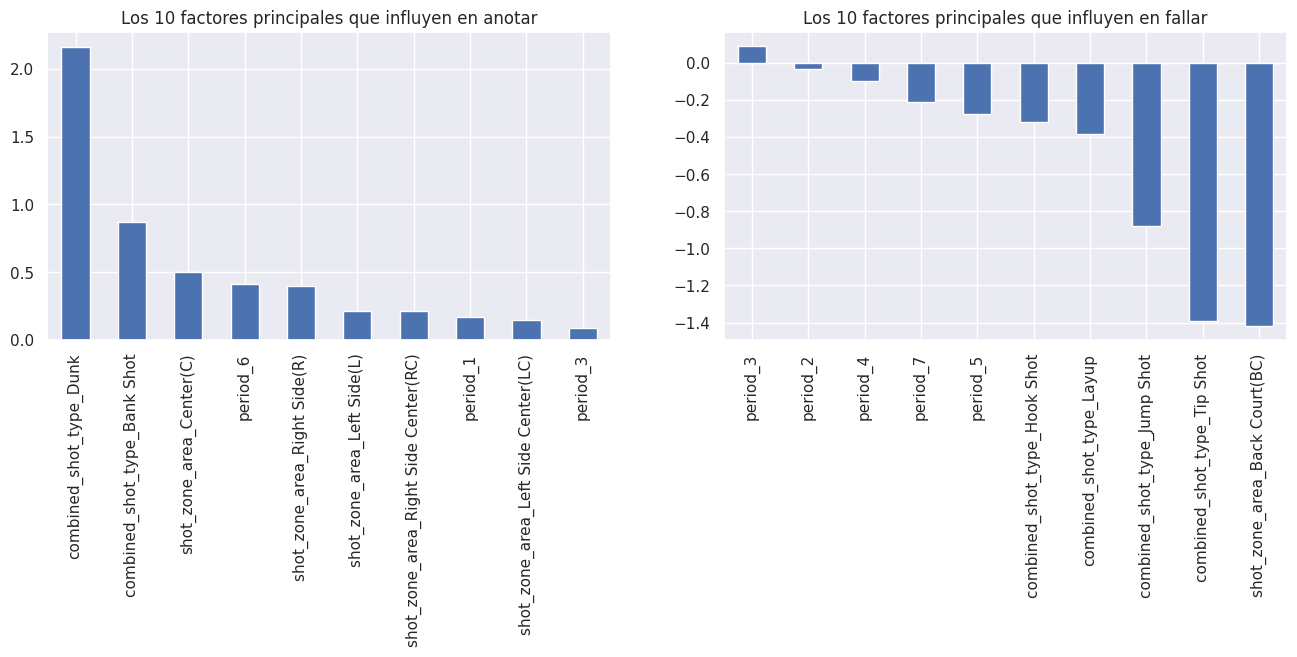

In [ ]:
weights = pd.Series(model.coef_[0], index=X.columns.values)

fig,axs = plt.subplots(1,2,figsize=(16,4))

weights.sort_values(ascending=False).head(10).plot(kind='bar',ax=axs[0],title='Los 10 factores principales que influyen en anotar')
weights.sort_values(ascending=False).tail(10).plot(kind='bar',ax=axs[1],title='Los 10 factores principales que influyen en fallar')

In [ ]:
print("clasifica bien el ", metrics.accuracy_score(y_test, pred_test)*100, "%  de los datos")

clasifica bien el  62.29116945107399 %  de los datos


Matriz de Confusión:


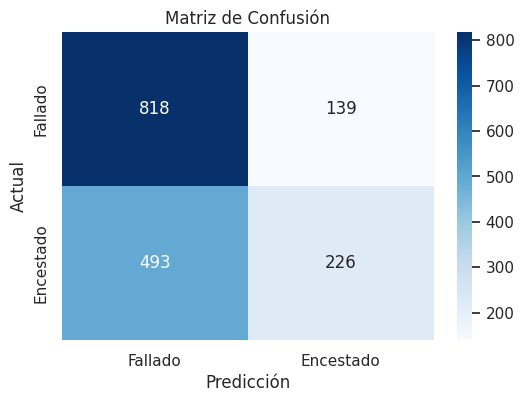

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, pred_test)

# Mostrar la matriz de confusión
print("Matriz de Confusión:")

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fallado', 'Encestado'], yticklabels=['Fallado', 'Encestado'])
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

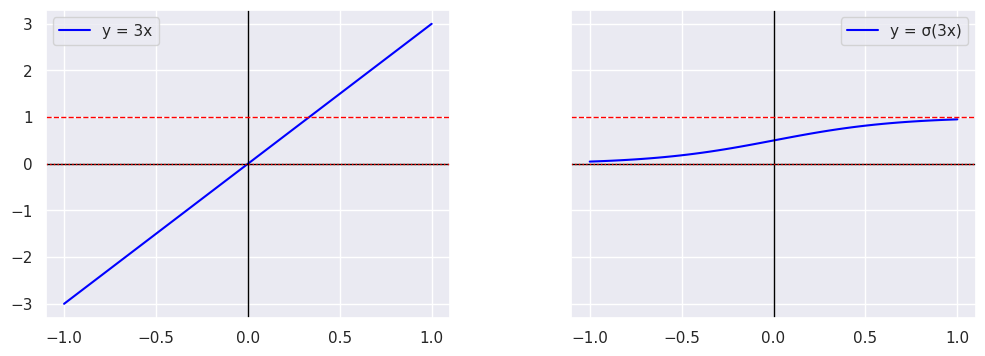

In [ ]:
x = np.linspace(-1,1)
y = np.linspace(-3,3)

def f(z): return 1 / (1 + np.exp(-z))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)  # 12 de ancho por 4 de alto

# Primera gráfica
ax1.plot(x, y, color='blue',label='y = 3x')
ax1.axhline(0, color='black',linewidth=1)  # Eje horizontal (Y)
ax1.axvline(0, color='black',linewidth=1)  # Eje vertical (X)
ax1.axhline(1, color='red',linewidth=1, linestyle='--')
ax1.axhline(0, color='red',linewidth=1, linestyle='dotted')
ax1.grid(True)
ax1.legend()

# Segunda gráfica
ax2.plot(x, f(y), color='blue', label='y = σ(3x)')
ax2.axhline(0, color='black',linewidth=1)  # Eje horizontal (Y)
ax2.axvline(0, color='black',linewidth=1)  # Eje vertical (X)
ax2.axhline(1, color='red',linewidth=1, linestyle='--')
ax2.axhline(0, color='red',linewidth=1, linestyle='dotted')
ax2.grid(True)
ax2.legend()

plt.subplots_adjust(wspace=0.3)


# Mostrar el gráfico
plt.show()